Ola!Este é um estudo usando pyhton sobre os "salarios" dos "cientistad de dados"

**1. vamos importar a bibiliotecas**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

Peguei o diretorio do kaggle e copiei o caminho

In [2]:
df=pd.read_csv('../input/data-science-job-salaries/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


No arquivo a colunas que não queremos trabalhar como: "Unnamed", "Salary", "Salary_curreny"
no caso queremos trabalhar com a parte Em dolar(USD).Assim teremos melhor jeito de fazer uma analise com os dados.Logo iremos remover elas.

In [3]:
df.drop(['Unnamed: 0','salary_currency','salary'], axis=1, inplace=True)

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


In [6]:
df.duplicated().value_counts()

False    565
True      42
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().value_counts()

False    565
dtype: int64

podemos mudar os nomes dos paises que são de 2 letras para normais usando a biblioteca 
country_convert --upgrade


(caso vc n estaja conseguindo acessar a biblioteca, é pq vc ainda n ativou o settings)
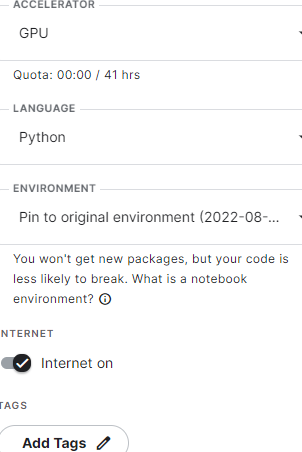


In [9]:
pip install country_converter --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 633.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for country_converter: filename=country_converter-0.7.7-py3-none-any.whl size=53786 sha256=a7f74ae66387f40da7ebddb7a7ae8e036057f51f2080624cf0c7bacf9f2e4e94
  Stored in directory: /root/.cache/pip/wheels/e8/e6/60/61798a8a91462250002293d1c8cc8de90a130119a813277ccc
Successfully built country_converter
Note: you may need to restart the kernel to use updated packages.


In [10]:
import country_converter as coco

In [11]:
df['company_location']= coco.convert(names=df['company_location'], to='name_short')
df['employee_residence']= coco.convert(names=df['employee_residence'], to='name_short')

vamos mudar os nomes para versões mais simples

In [12]:
df['experience_level']=df['experience_level'].replace(['MI','SE','EX','EN'],['Nivel-Medio','Nivel-Senhor','Nivel-Executivo','Nivel-Iniciante'])

In [13]:
df['employment_type']=df['employment_type'].replace(['FT','CT','PT','FL'],['Tempo-integral','Contrato','Trabalho-parcial','Freelance'])

In [14]:
df['company_size']=df['company_size'].replace(['S','L','M'],['Pequena','Grande','Medio'])

In [15]:
df['remote_ratio']=df['remote_ratio'].replace([0,50,100],['No-local','Hibrido','Remoto'])

In [16]:
df['job_title']=df['job_title'].replace(['Data Scientist','Machine Learning Scientist','Big Data Engineer','Product Data Analyst','Data Analyst','Lead Data Scientist','Lead Data Engineer','Lead Data Analyst','Machine Learning Engineer','Data Engineer','Business Data Analyst','BI Data Analyst','Director of Data Science','Research Scientist','Data Science Manager'],['Cientista-de-Dados','Cientista-de-IA','Engenheiro-de-Dados','Analista-de-dados-do-produtos','Analista-de-Dados','Cientista-de-Dados-Senior','Engenheiro-de-Dados-Senior','Analista de Dados Senior','Engenheiro de IA','Engenheiro de Dados','Analista de dados de Negocios','Analista de dados BI','Director de Ciência de Dados','Cientista de Pesquisa','Cientista de Dados Gerente'])

In [17]:
df.head(30)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Nivel-Medio,Tempo-integral,Cientista-de-Dados,79833,Germany,No-local,Germany,Grande
1,2020,Nivel-Senhor,Tempo-integral,Cientista-de-IA,260000,Japan,No-local,Japan,Pequena
2,2020,Nivel-Senhor,Tempo-integral,Engenheiro-de-Dados,109024,United Kingdom,Hibrido,United Kingdom,Medio
3,2020,Nivel-Medio,Tempo-integral,Analista-de-dados-do-produtos,20000,Honduras,No-local,Honduras,Pequena
4,2020,Nivel-Senhor,Tempo-integral,Engenheiro de IA,150000,United States,Hibrido,United States,Grande
5,2020,Nivel-Iniciante,Tempo-integral,Analista-de-Dados,72000,United States,Remoto,United States,Grande
6,2020,Nivel-Senhor,Tempo-integral,Cientista-de-Dados-Senior,190000,United States,Remoto,United States,Pequena
7,2020,Nivel-Medio,Tempo-integral,Cientista-de-Dados,35735,Hungary,Hibrido,Hungary,Grande
8,2020,Nivel-Medio,Tempo-integral,Analista de dados de Negocios,135000,United States,Remoto,United States,Grande
9,2020,Nivel-Senhor,Tempo-integral,Engenheiro-de-Dados-Senior,125000,New Zealand,Hibrido,New Zealand,Pequena


****2. ANALISE DOS DADOS****

In [18]:
Exp=df['experience_level'].value_counts()
fig=px.pie(names=Exp.index,
           values=Exp.values,
           color=Exp.index,
           title='Distribuição de trabalho por Expericencia de Trabalho ',
           template='plotly_dark')
fig.update_traces(textinfo='label+percent+value')
fig.show()

In [19]:
Remoto=df['remote_ratio'].value_counts()
fig=px.pie(names=Remoto.index,
          values=Remoto.values,
          color=Remoto.index,
          title='Distribuição de trabalho baseado localidade remota',
          template='plotly_dark')
fig.update_traces(textinfo='label+percent+value')
fig.show()

****Percebe-se 61.2% das empresas possuem seus trabalhadores de na modalidade remota****

In [20]:
Remoto=df['remote_ratio'].value_counts()
fig=px.pie(names=Remoto.index,
          values=Remoto.values,
          color=Remoto.index,
          title='Distribuição de trabalho baseado localidade remota',
          template='plotly_dark')
fig.update_traces(textinfo='label+percent+value')
fig.show()

In [21]:
tamanho=df['company_size'].value_counts()
fig=px.pie(names=tamanho.index,
           values=tamanho.values,
           color=tamanho.index,
           title='TAMANHOS DAS EMPRESAS',
           template='plotly_dark')
fig.update_traces(textinfo='label+percent+value')
fig.show()

Empresas de medio porte representão mais da metade no mercado de ciência de dados

In [22]:
df['mesma area']=df.apply(lambda x: 'same location' if x.employee_residence==x.company_location 
                          else 'different location',axis=1)
df['mesma area'].value_counts()

same location         514
different location     51
Name: mesma area, dtype: int64

In [23]:
df['mesma_area_remoto']=df.apply(lambda x: ' remoto' if (x.employee_residence==x.company_location)&(x.remote_ratio=='Remoto') else 'não remoto', axis=1)
remoto=df['mesma_area_remoto'].value_counts()
fig=px.pie(names=remoto.index,
          values=remoto.values,
          color=remoto.index,
          title='Funcionarios na mesma Area mas trabalhando remotamente',
          template='plotly_dark')
fig.update_traces(textinfo='label+percent+value')
fig.show()

In [24]:
melhores_10_localizacao=df['company_location'].value_counts().head(10)

In [25]:
Nao_remotos=df['employee_residence'].value_counts().head(10)
fig=px.bar(x=Nao_remotos.index,
          y=Nao_remotos.values,
           color=Nao_remotos.index,
           text=Nao_remotos.values,
           title='Funcionarios não remotos por pais'
          )
fig.update_layout(xaxis_title='Pais',yaxis_title='Não remotos')

In [26]:
salario_funcionario=df.groupby(by='company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
fig=px.bar(x=salario_funcionario.index,
          y=salario_funcionario.values,
           color=salario_funcionario.index,
           text=salario_funcionario.values,
           title='Paises com maior salario medio'
          )
fig.update_layout(xaxis_title='Pais',yaxis_title='Salario em USD')

russos são os funcionarios quem ficam em primeiro lugar recebendo em media 1575000 USD em seguida Estados Unidos e Nova Zelandia

In [27]:
melhores_trabalhos=df['job_title'].value_counts().head(10)
fig=px.bar(x=melhores_trabalhos.index,
          y=melhores_trabalhos.values,
          color=melhores_trabalhos.index,
          text=melhores_trabalhos.values,
          title='melhores trabalhos')
fig.update_layout(xaxis_title='Funcao',yaxis_title='Quantidade de Funcionarios')